# Do mountaineers die younger?

![Hermann Buhl](buhl2.webp)


A question often asked and typically answered with an emphatic _YES_ is if mountaineers and climbers do indeed die younger than people with less exposure to severe weather conditions, high altitude, and overhanging rock. Here's a little attempt to answer this question, using the __Wikipedia API__ to get the data, some processing of the text data, and some basic data visualisation.

In [3]:
## Import stuff
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import string
import wikipedia
import wikipediaapi
import re

In [4]:
## Get data from Wikipedia; if this fails, try a few more times
article_name = "List of climbers and mountaineers"

## initialize wiki page
wiki_wiki = wikipediaapi.Wikipedia('en')
mountaineers = wiki_wiki.page(article_name)

## get only the text data
mountaineers = mountaineers.text

In [5]:
## Check data
print("Type is: ", type(mountaineers))
print("Number of letters: ", len(mountaineers))

Type is:  <class 'str'>
Number of letters:  49751


In [6]:
## Split at new line and glimpse at the data
mountaineers = mountaineers.split("\n")
mountaineers = mountaineers[3:]
print("Number of entries: ", len(mountaineers))
mountaineers[:10]

Number of entries:  589


['Vitaly Abalakov (1906–1992) Russia, climbed Lenin Peak (1934) and Khan Tengri (1936)',
 'Yevgeniy Abalakov (1907–1948) Russia, climbed Communism Peak (1933)',
 'Premlata Agarwal (born 1963) India, first Indian woman to complete all Seven Summits',
 'H. P. S. Ahluwalia (fl. 1965) India, climbed Mount Everest in 1965',
 'Pierre Allain (1904–2000) France, championed bouldering at Fontainebleau, and inventor of rubber rock-climbing shoes',
 'Christian Almer (1826–1898) Switzerland, numerous first ascents, including Eiger',
 'Ashraf Aman (born 1943) Pakistan, first Pakistani ascent of K2',
 'Luigi Amedeo, Duke of Abruzzi (1873–1933) Italy, first ascent of Mount Saint Elias of the Rwenzori Mountains',
 'Pat Ament (born 1946) US, rock climber and pioneer boulderer',
 'Melchior Anderegg (1827–1912) Switzerland, guide, with numerous first ascents, including new routes on Mont Blanc']

We can see that we now have a list of strings, one for each mountaineer, typically starting with their name, birth (and death) year, country, and some additional informationon their accomplishments in the mountains. In the following, we will grab the relevant info so we can plot what we're interested in.

In [7]:
## Turn into pandas df
df = pd.DataFrame(mountaineers)
df.head(10)

,0
0,"Vitaly Abalakov (1906–1992) Russia, climbed Le..."
1,"Yevgeniy Abalakov (1907–1948) Russia, climbed ..."
2,"Premlata Agarwal (born 1963) India, first Indi..."
3,"H. P. S. Ahluwalia (fl. 1965) India, climbed M..."
4,"Pierre Allain (1904–2000) France, championed b..."
5,"Christian Almer (1826–1898) Switzerland, numer..."
6,"Ashraf Aman (born 1943) Pakistan, first Pakist..."
7,"Luigi Amedeo, Duke of Abruzzi (1873–1933) Ital..."
8,"Pat Ament (born 1946) US, rock climber and pio..."
9,"Melchior Anderegg (1827–1912) Switzerland, gui..."


In [8]:
df.tail(10)

,0
579,Wawrzyniec Żuławski (1916–1957) Polish compose...
580,"Matthias Zurbriggen (1856–1917) Switzerland, f..."
581,
582,See also
583,List of 20th-century summiters of Mount Everest
584,
585,References
586,External links
587,
588,Mountaineering Who's Who


In [9]:
## Drop last rows that contain Wikipedia links
df.drop(df.tail(8).index,inplace=True) # drop last n rows
df.tail()


,0
576,Jerzy Żuławski (1874–1915) Polish literary fig...
577,"Juliusz Żuławski (1910–1999) Polish poet, pros..."
578,"Marek Żuławski (1908–1985) Polish painter, gra..."
579,Wawrzyniec Żuławski (1916–1957) Polish compose...
580,"Matthias Zurbriggen (1856–1917) Switzerland, f..."


In [10]:
## Grab the name, which is always followed by a bracket
df = df[0].str.split("(", n=1, expand=True)
df = df.rename(columns={0: "Name"})
df.sample(10)

,Name,1
122,Sophia Danenberg,"born 1972) US, first African American and firs..."
257,Ganesh Jena,"born 1972) India, first male from Odisha, Indi..."
366,Phyllis Munday,"1894–1990) Canada, mountaineer and explorer, e..."
140,E,None
255,Zbigniew Jaworowski,None
329,Rafał Malczewski,None
289,Hans Kraus,"1905–1995) Austria, pioneering rock climber an..."
471,Doug Scott,"1941–2020) UK, Seven Summits, first ascent Eve..."
25,Kinga Baranowska,"born 1975), Poland, first Polish woman to have..."
183,Azim Gheychisaz,born 1981) Iranian mountain climber who climeb...


In [11]:
## Check where name is longer than 6 words
df[df["Name"].str.split(" ").str.len() > 6]

,Name,1
17,"Abdul Jabbar Bhatti, Pakistani mountaineer and...",None
20,"Samina Baig - Gilgit-Baltistan, 3rd Pakistani ...",None
28,Andrzej Bargiel Current record holder in speed...,None
41,"Didier Berthod Switzerland, featured in First ...",None
167,"Tom Frost US, rock climber, first ascents of b...",None
175,"Lene Gammelgaard Denmark, author of Climbing H...",None
202,"Dave Hahn - US, 11 Everest ascents, 26 Vinson ...",None
256,Narendra Dhar Jayal a.k.a. 'Nandu' Jayal,"died 1958) India, first Director of Himalayan ..."
354,"Tyrhee Moore US, member of the first all Afric...",None
374,"Fred Nicole Switzerland, numerous first ascent...",None


We see that there's a bunch of useless entries, as they don't contain relevant information. Let's ditch them.

In [12]:
## Drop rows with long names
df = df[df["Name"].str.split(" ").str.len() < 7]
## Drop rows with short names (like list characters, A, B, C, D,...)
df = df[df["Name"].str.split("").str.len() > 3]
print("Number of rows: ", df.shape[0])
df.sample(10)

Number of rows:  516


,Name,1
375,Jamling Tenzing Norgay,"born 1965) Nepal, son of Tenzing Norgay, climb..."
288,Jon Krakauer,"born 1954) US, author and mountaineer, summite..."
486,Laurie Skreslet,"born 1949) Canada, first Canadian to summit Ev..."
417,Petrarch,"1304–1374) Italy, climbed Mont Ventoux (1336)"
436,Aron Ralston,"born 1975) US, gained fame after amputating hi..."
90,Chhurim,"born 1984) Nepal, first woman to reach Everest..."
542,Lucy Walker,"1836–1916) UK, first female ascent Matterhorn ..."
284,Christian Klucker,"1853–1928) Switzerland, guide, prolific first ..."
315,George Lowe,"1924–2013) New Zealand, last surviving member ..."
473,Chris Sharma,"born 1981) US, first to climb consensus 9a+ (5..."


In [13]:
## Grab the birth (and, where applicable, death) year
df[["Year","Rest"]] = df[1].str.split(")",n=1,expand=True)
df = df.drop(1,axis=1)
df.sample(10)


,Name,Year,Rest
493,William Grant Stairs,1863–1892,"Canada, first non-African to climb in the Ruw..."
516,Francis Fox Tuckett,1834–1913,"UK, first ascent Aletschhorn (1859)"
246,Alberto Iñurrategi,born 1968,"Basque, Spain, youngest person to climb all e..."
33,Mark Beaufoy,1764–1827,"UK, fourth ascent Mont Blanc (1787)"
196,Paul Güssfeldt,1840–1920,"Germany, first ascent Peuterey ridge and Piz ..."
254,Tim Jarvis,born 1966,"Australia/UK, re-created Shackleton's South G..."
485,Cecilie Skog,born 1974,"Norway, first female to climb Seven Summits a..."
569,Geoffrey Winthrop Young,1876–1958,"UK, first ascent Täschhorn south face, Weissh..."
303,Lino Lacedelli,1925–2009,"Italy, first ascent K2 (1954) with Achille Co..."
443,Dorothy Pilley Richards,1894–1986,"UK, wrote Climbing Days (1935)"


In [14]:
## Split birth and death year
df[["Born","Died"]] = df["Year"].str.split("–",n=1,expand=True)
df = df.drop("Year",axis=1)
df.sample(10)

,Name,Rest,Born,Died
225,Edmund Hillary,"New Zealand, first ascent Everest (1953) with...",1919,2008
452,André Roch,"Switzerland, Everest 1952 attempt, many first...",1906,2002
187,Dan Goodwin,"US, rock/building climber, climbed World Trad...",born 1955,None
214,Elizabeth Hawkins-Whitshed,"UK, pioneer of mountaineering, mountain photo...",1860,1934
417,Petrarch,"Italy, climbed Mont Ventoux (1336)",1304,1374
141,James Eccles,"UK, first ascents in Mont Blanc massif",1838,1915
113,Aleister Crowley,"UK, occultist, writer, and rock climber, led ...",1875,1947
92,Yvon Chouinard,"US, pioneer of Yosemite climbing, founder of ...",born 1938,None
333,Marie Marvingt,"France, first woman to climb most major peaks...",1875,1963
470,Peter Schoening,"US, first ascent Gasherbrum I and Vinson Mass...",1927,2004


In [15]:
## Grab country
Country = df["Rest"].str.split(n=1,expand=True)
Country = Country[0].str.strip(",")
df["Country"] = Country
df = df.drop("Rest",axis=1)
df.sample(10)

,Name,Born,Died,Country
217,Zygmunt Andrzej Heinrich,None,None,None
330,Tashi and Nungshi Malik,born 1991,None,India
188,Dave Graham,born 1981,None,US
497,Fritz Steuri,1879,1950,Switzerland
363,Norrie Muir,1948,2019,Scotland
193,Michael Groom,born 1959,None,Australia
122,Sophia Danenberg,born 1972,None,US
310,Philip Ling,fl. 2006,None,Australia
366,Phyllis Munday,1894,1990,Canada
306,David Lama,1990,2019,Austria


In [16]:
## extract digits from birth and death year
df['Born'] = df['Born'].str.extract('(\d+)')
df['Died'] = df['Died'].str.extract('(\d+)')
df.sample(10)


,Name,Born,Died,Country
298,Wojciech Kurtyka,1947,NaN,Poland
372,Vitor Negrete,1967,2006,Brazil
272,Peter Kaufmann,1858,1924,Switzerland
48,Arlene Blum,1945,NaN,US
580,Matthias Zurbriggen,1856,1917,Switzerland
367,Malli Mastan Babu,1974,2015,India
576,Jerzy Żuławski,1874,1915,Polish
101,Achille Compagnoni,1914,2009,Italy
131,Jan Długosz mountaineer,NaN,NaN,None
322,Tim Macartney-Snape,1956,NaN,Australia


In [17]:
## Turn year into datetime
df["Born"] = pd.to_datetime(df["Born"], errors = 'coerce').dt.year
df["Died"] = pd.to_datetime(df["Died"], errors = 'coerce').dt.year
df.sample(10)

,Name,Born,Died,Country
274,Robert Kayen,1959.0,NaN,US
251,John Jackson,1921.0,2005.0,UK
315,George Lowe,1924.0,2013.0,New
112,Peter Croft,1958.0,NaN,Canada
182,Conrad Gessner,NaN,NaN,Switzerland
566,Michael J. Ybarra,1966.0,2012.0,US
573,Andrzej Zawada,1928.0,2000.0,Poland
32,Robert Hicks Bates,1911.0,2007.0,US
208,Alison Hargreaves,1963.0,1995.0,UK
296,Jaan Künnap,1948.0,NaN,Estonia


In [18]:
## Drop those without a birth year
df = df[df["Born"].notna()]
df["Age"] = df["Died"] - df["Born"]
print("Number of rows: ", df.shape[0])
df.sample(10)

Number of rows:  486


,Name,Born,Died,Country,Age
26,Anna Barańska,1976.0,NaN,Poland,NaN
555,Sydney Wignall,1922.0,NaN,UK,NaN
426,Bonnie Prudden,1914.0,2011.0,pioneering,97.0
192,Paul Grohmann,1838.0,1908.0,Austria,70.0
172,Patrick Gabarrou,1951.0,NaN,France,NaN
65,David Breashears,1956.0,NaN,US,NaN
24,George Band,1929.0,2011.0,UK,82.0
261,Raghav Joneja,1997.0,NaN,India,NaN
513,Bill Tilman,1898.0,1977.0,UK,79.0
32,Robert Hicks Bates,1911.0,2007.0,US,96.0


In [19]:
## create column for vitality and age
df["Alive"] = np.where(df['Age'].notna(), "Dead", "Alive")
df.loc[df["Died"].isna(), "Age"] = 2022 - df["Born"]
## Clean too old one's (aka death year missing)
df = df[df["Age"] < 105]
df.sample(10)

,Name,Born,Died,Country,Age,Alive
508,Vernon Tejas,1953.0,NaN,US,69.0,Alive
482,Joe Simpson,1960.0,NaN,UK,62.0,Alive
557,George Willig,1949.0,NaN,US,73.0,Alive
555,Sydney Wignall,1922.0,NaN,UK,100.0,Alive
188,Dave Graham,1981.0,NaN,US,41.0,Alive
279,Mikhail Khergiani,1932.0,NaN,,90.0,Alive
11,Tyler Armstrong,2004.0,NaN,US,18.0,Alive
292,Julius Kugy,1858.0,1944.0,Austria-Slovenia,86.0,Dead
358,Simone Moro,1967.0,NaN,Italy,55.0,Alive
386,Cathy O'Dowd,1968.0,NaN,South,54.0,Alive


In [20]:
replacement_dict = {"Austrian": "Austria", 
                    "Polish": "Poland", 
                    "Duchy": "France", 
                    "": "Unknown", 
                    "FPR": "Croatia", 
                    "Scottish": "UK",
                    "Scotland": "UK", 
                    "New": "New Zealand",
                    "Britain": "UK",
                    "British": "UK",
                    "Germany/Switzerland": "Germany",
                    "Ireland?": "Ireland",
                    "Argentina/US": "Argentinia",
                    "Iranian": "Iran",
                    "Australia/UK": "Australia",
                    "Pakistani": "Pakistan",
                    "Austria/Canada": "Austria",
                    "Austria-Slovenia": "Slovenia",
                    "Czechoslovakia": "Czech Republic",
                    "Scottish-born": "UK",
                    "United": "US",
                    "Sherpa": "Nepal",
                    "Czech": "Czech Republic",
                    "Gilgit-Baltistan": "Pakistan",
                    "American": "US",
                    "Swiss": "Switzerland",
                    "Switzerland/US": "Switzerland",
                    "England/Australia": "Australia",
                    "Czech-Austrian": "Czech Republic",
                    "Canadian": "Canada",
                    "France/Ireland": "France",
                    "German": "Germany",
                    "in": "UK",
                    "a": "Poland",
                    "leader": "UK",
                    "First": "UK",
                    "pioneering": "US",
                    "Basque": "Spain",
                    "US": "United States",
                    "UK": "United Kingdom"
                    }


df = df.replace({'Country': replacement_dict})


In [21]:
## replace country "first" and "South" with country looked up on wikipedia
df.loc[df["Name"] == "Maciej Berbeka ", "Country"] = "Poland"
df.loc[df["Name"] == "Adam Bielecki ", "Country"] = "Poland"
df.loc[df["Name"] == "Klára Poláčková ", "Country"] = "Czech Republic"
df.loc[df["Name"] == "Ludwig Purtscheller ", "Country"] = "Austria"
df.loc[df["Name"] == "Pasang Lhamu Sherpa ", "Country"] = "Nepal"
df.loc[df["Name"] == "Bachendri Pal ", "Country"] = "India"
df.loc[df["Name"] == "Warren J. Harding ", "Country"] = "United States"
df.loc[df["Name"] == "Cathy O'Dowd ", "Country"] = "South Africa"
df.loc[df["Name"] == "Oh Eun-Sun ", "Country"] = "South Korea"
df.loc[df["Name"] == "Young-seok Park ", "Country"] = "South Korea"
df.loc[df["Name"] == "Um Hong-Gil ", "Country"] = "South Korea"
df.loc[df["Name"] == "Sibusiso Vilane ", "Country"] = "South Africa"


In [22]:
df = df[df["Country"].notna()]
print("Total number of climbers:", df.shape[0])
df.sample(10)

Total number of climbers: 483


,Name,Born,Died,Country,Age,Alive
179,Chanda Gayen,1979.0,2014.0,India,35.0,Dead
438,Michael Reardon,1974.0,2007.0,United States,33.0,Dead
212,Ginette Harrison,1958.0,1999.0,United Kingdom,41.0,Dead
432,Boyan Petrov,1973.0,NaN,Bulgaria,49.0,Alive
281,Andy Kirkpatrick,1971.0,NaN,United Kingdom,51.0,Alive
347,John Middendorf,1959.0,NaN,United States,63.0,Alive
536,Ed Viesturs,1959.0,NaN,United States,63.0,Alive
260,Alex Johnson,1989.0,NaN,United States,33.0,Alive
531,Arjun Vajpai,1993.0,NaN,India,29.0,Alive
21,John Bachar,1957.0,2009.0,United States,52.0,Dead


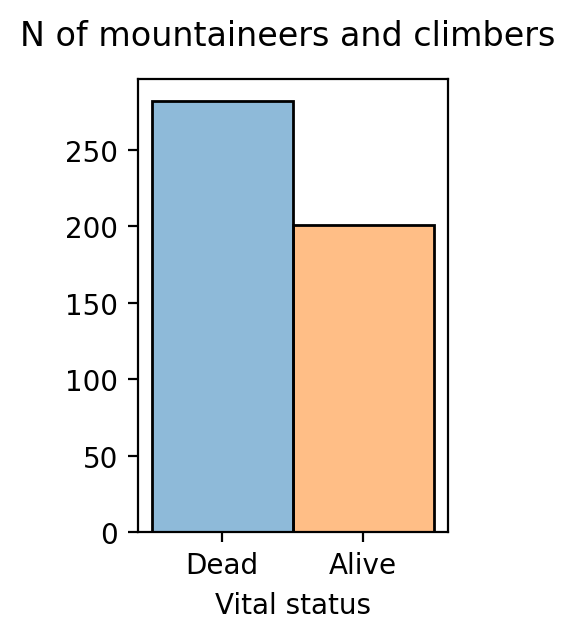

In [23]:
## Plot dead and alive
plt.figure(figsize=(2,3),dpi=200)
ax = sns.histplot(data=df,x="Alive", hue="Alive", legend=False)
ax.set(xlabel="Vital status", ylabel="")
plt.suptitle("N of mountaineers and climbers")
plt.show()


In the above plot we can see that more mountaineers in this list are dead than alive. This doesn't tell us much, the past is bigger than the present. Let's dig in a bit.

## Number of dead/alive mountaineers by country

In [24]:
## make df for plotting
plot_data = pd.DataFrame(df[["Country"]].groupby(["Country"]).value_counts()).reset_index()
plot_data.columns = ["Country", "Count"]
plot_data = plot_data.sort_values("Count", ascending=False).head(25)

dead_ones = df[["Country", "Alive"]].groupby(["Country", "Alive"]).value_counts().reset_index().sort_values(0, ascending=False)
dead_ones.columns = ["Country", "Alive", "Dead"]
plot_data = pd.merge(plot_data, dead_ones[["Dead", "Country"]][dead_ones["Alive"]=="Dead"].head(25), on="Country", how="left").fillna(0)

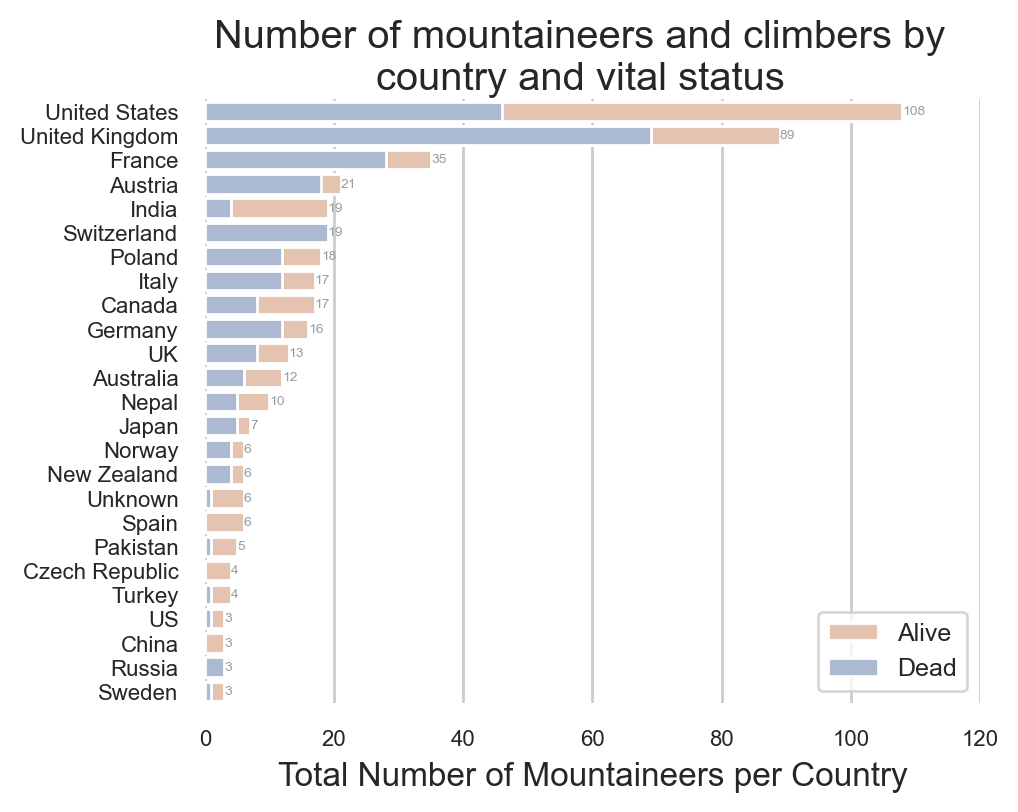

In [25]:
## Plot per country
sns.set_theme(style="whitegrid")

f, ax = plt.subplots(figsize=(5,4),dpi=200)

sns.set_color_codes("pastel")
sns.barplot(x="Count", 
            y="Country", 
            data=plot_data,
            label="Alive", 
            color = "#EDC2A7", 
            order=plot_data.sort_values('Count', ascending=False).Country)

sns.set_color_codes("muted")
sns.barplot(x="Dead", 
            y="Country", 
            data=plot_data,
            label="Dead", 
            color = "#A5B8D7", 
            order=plot_data.sort_values('Count', ascending=False).Country)

ax.legend(ncol=1, loc="lower right", frameon=True, fontsize=9)
ax.set(xlim=(0, 120), ylabel="",
       xlabel="Total Number of Mountaineers per Country")
ax.bar_label(ax.containers[0], size=5, label_type="edge", padding=0, color="#999DA0")
plt.suptitle("Number of mountaineers and climbers by\ncountry and vital status")

ax.tick_params(labelsize=8)

sns.despine(left=True, bottom=True)

The __vast__ majority of climbers and mountaineers in this list are from either the US or the UK. The UK has historically been a [pioneering mountaineering country](https://en.wikipedia.org/wiki/Golden_age_of_alpinism), whereas the US produced many legendary climbers _and_ mountaineers in the 20th century.

## Age distribution by vital status

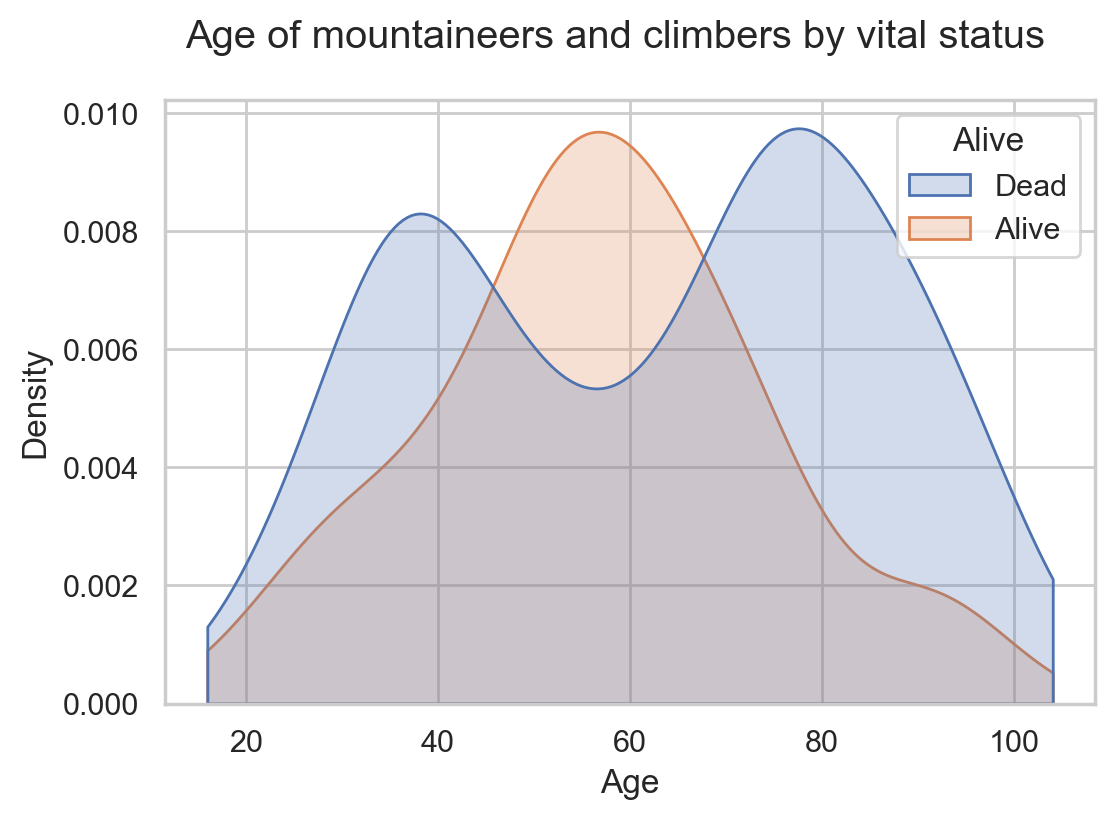

In [26]:
plt.figure(figsize=(6,4),dpi=200)
sns.kdeplot(data=df,x="Age",hue="Alive",fill=True, clip=[df["Age"].min(),df["Age"].max()])
plt.suptitle("Age of mountaineers and climbers by vital status");

In the plot above we see a first pattern: Those legendary mountaineers still alive show an almost bell-shaped age distribution, with a mean around 55 years. Of course it takes some striking accomplishments to end up in this list, which is the reason for the thinning left end. More interesting, however, is the bimodal distribution of the dead ones: We see one peak at around 38 years and another on around 78 years. Let's have a closer look at those that no longer climb mountains.

Life expectancy changed quite drastrically in the last centuries; let's have a look at how this manifested in mountaineers.

## Age at death by century born

In [27]:
df["Century"] = np.where(df['Born'] < 1900, "before 1900", "after 1900")
df.sample(10)

,Name,Born,Died,Country,Age,Alive,Century
129,Kurt Diemberger,1932.0,NaN,Austria,90.0,Alive,after 1900
472,Vittorio Sella,1859.0,1943.0,Italy,84.0,Dead,before 1900
173,Will Gadd,1967.0,NaN,Canada,55.0,Alive,after 1900
538,Ludwig Vörg,1911.0,1941.0,Germany,30.0,Dead,after 1900
295,Colonel Narendra Kumar,1933.0,2020.0,India,87.0,Dead,after 1900
559,Ian Woodall,1956.0,NaN,United Kingdom,66.0,Alive,after 1900
194,Bear Grylls,1974.0,NaN,UK,48.0,Alive,after 1900
197,Veikka Gustafsson,1968.0,NaN,Finland,54.0,Alive,after 1900
47,Karl Blodig,1859.0,1956.0,Austria,97.0,Dead,before 1900
481,William Shockley,1910.0,1989.0,United States,79.0,Dead,after 1900


Text(72, 0.011, '1950')

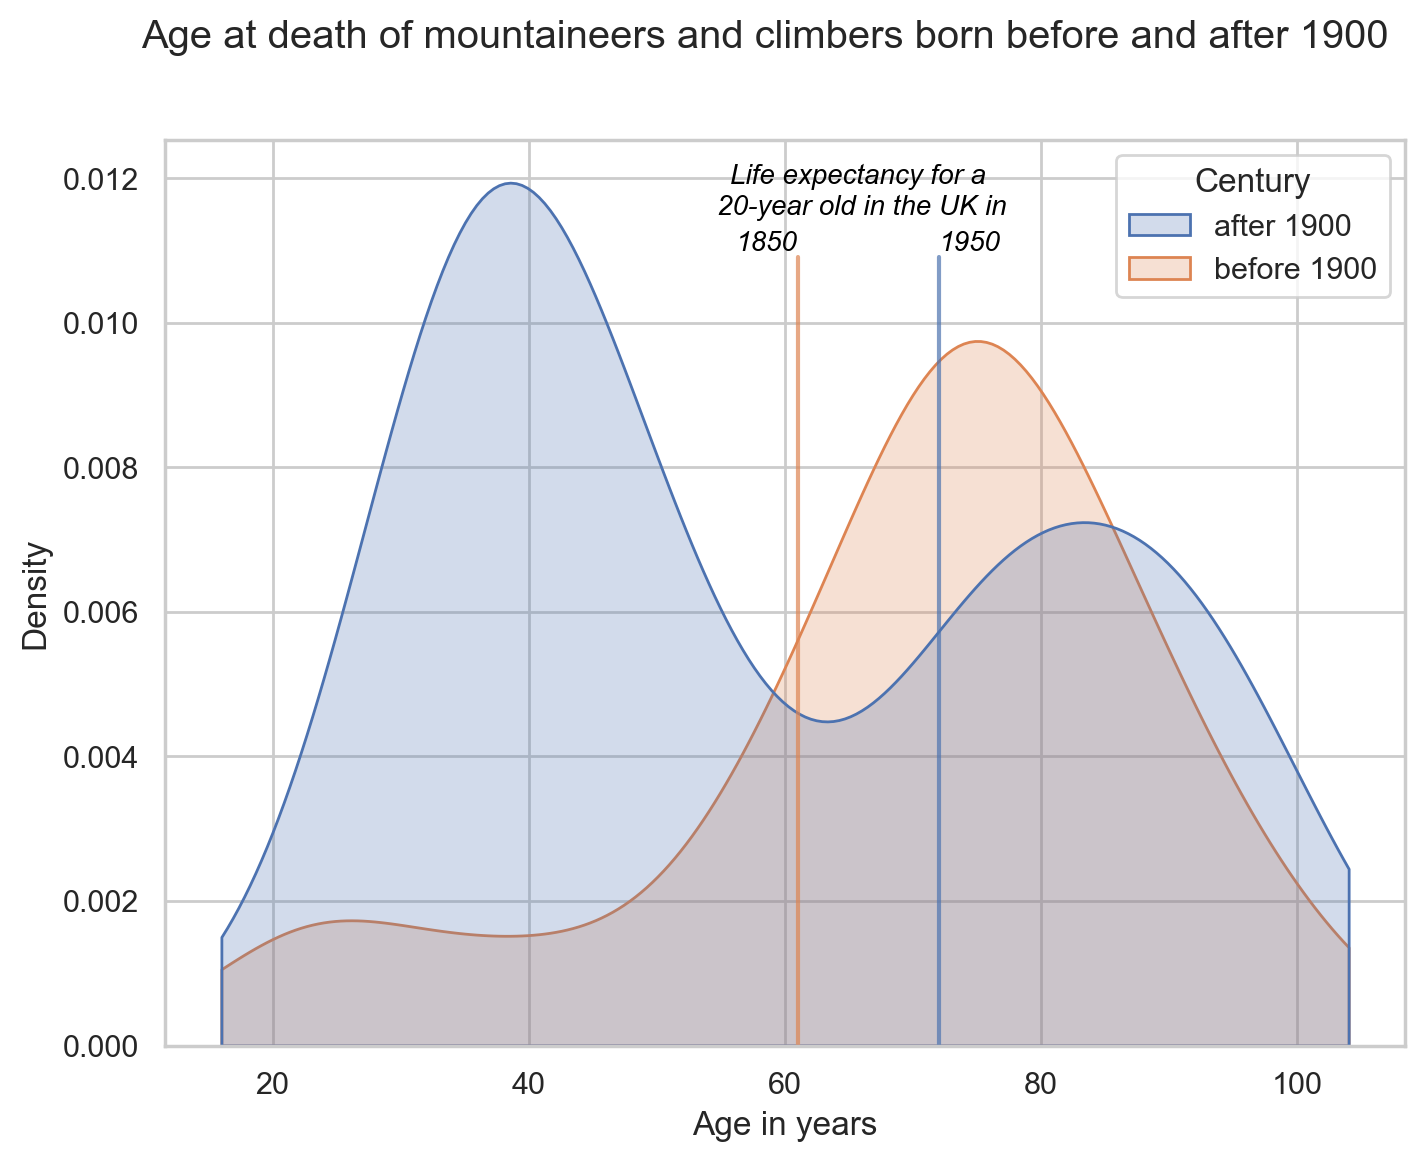

In [28]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=df[df["Alive"] == "Dead"],x="Age",hue="Century",fill=True,clip=[df["Age"].min(),df["Age"].max()])
plt.xlabel('Age in years')
plt.suptitle("Age at death of mountaineers and climbers born before and after 1900")

plt.axvline(61, 0, 0.87,color="#DD8452",alpha=.7) # life expectancy for a 20 year old in the UK 1850 https://ourworldindata.org/life-expectancy
plt.axvline(72, 0, 0.87,color="#4C73AF",alpha=.7) # life expectancy for a 20 year old in the UK 1950

plt.text(66, 0.0115, "Life expectancy for a \n20-year old in the UK in", horizontalalignment='center', size='small', color='black',style="italic")
plt.text(61, 0.011, "1850", horizontalalignment='right', size='small', color='black',style="italic")
plt.text(72, 0.011, "1950", horizontalalignment='left', size='small', color='black',style="italic")

__Spännande!__ Those mountaineers born before 1900 show a peak far above the [mean life expectancy of a 20-year old in the UK in 1850](https://ourworldindata.org/life-expectancy), clearly indicating that not many died of an unnatural death somewhere in the mountains. The reason being probably that neither high altitude mountaineering nor modern climbing existed, the dangers of a fatal accident were thus considerably lower. Those early pioneers discovered rather what we'd call hiking nowadays. 

__What about their increased life expectancy?__ Well, physical exercise in fresh air clearly contributes to a healthy and long life. A greater contributer however, might be their socio-economic status: Almost all mountaineers back then had a wealthy and aristocratic background and were spared a life of physical labour.

__For the modern climbers__ born 1900 or later, we see another bimodal distribution: The right hand peak arguably represents those that died of a natural death, again, well above the mean life expectancy on a population level in 1950. This time, however, it might rather be physical exercise and a healthy lifestyle supporting a longer life, since many of the famous climbers after 1900 were in fact working class or farmers (possibly adding to their recklessness).

__The peak to the left at around 38 years__ likely support the general stereotype of the daredevil in the mountain, riksing their life for purposeless yest meaningful joy. Let's do a quick and dirty check if this assumption about the type of cause of death holds.

In [29]:
## Subset data
dead_late = df[(df["Alive"] == "Dead") & (df["Century"]== "after 1900")]
dead_late["Death"] = np.where(dead_late["Age"] < 60, "premature", "natural");
dead_late.sample(10)

/var/folders/xb/pt024ps902n3_j_408fhg66h0000gn/T/ipykernel_13043/2388800693.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dead_late["Death"] = np.where(dead_late["Age"] < 60, "premature", "natural");


,Name,Born,Died,Country,Age,Alive,Century,Death
315,George Lowe,1924.0,2013.0,New Zealand,89.0,Dead,after 1900,natural
526,Willi Unsoeld,1926.0,1979.0,United States,53.0,Dead,after 1900,premature
359,Don Morrison,1929.0,1977.0,United Kingdom,48.0,Dead,after 1900,premature
438,Michael Reardon,1974.0,2007.0,United States,33.0,Dead,after 1900,premature
150,Nick Estcourt,1942.0,1978.0,United Kingdom,36.0,Dead,after 1900,premature
447,Ang Rita,1948.0,2020.0,Nepal,72.0,Dead,after 1900,natural
203,Artur Hajzer,1962.0,2013.0,Poland,51.0,Dead,after 1900,premature
311,Pete Livesey,1943.0,1998.0,United Kingdom,55.0,Dead,after 1900,premature
289,Hans Kraus,1905.0,1995.0,Austria,90.0,Dead,after 1900,natural
469,Marcus Schmuck,1925.0,2005.0,Austria,80.0,Dead,after 1900,natural


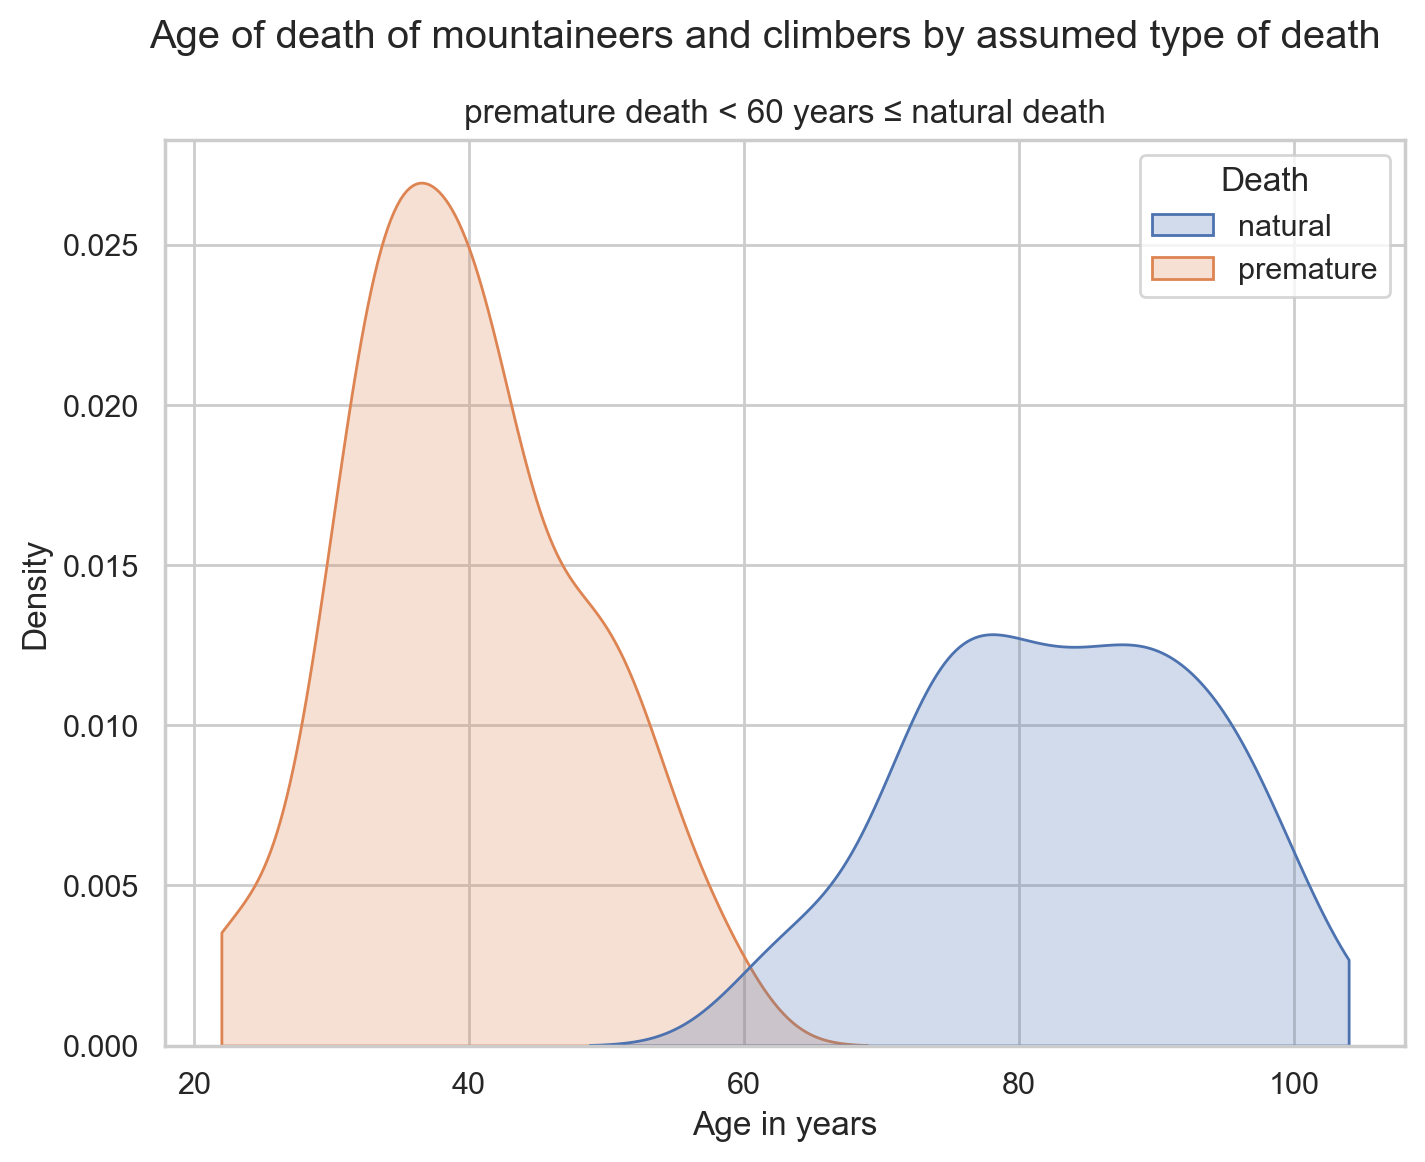

In [30]:
plt.figure(figsize=(8,6),dpi=200)

sns.kdeplot(data=dead_late,x="Age",hue="Death",fill=True,clip=[dead_late["Age"].min(),dead_late["Age"].max()])
plt.xlabel('Age in years')
plt.suptitle("Age of death of mountaineers and climbers by assumed type of death")
plt.title("premature death < 60 years ≤ natural death")
plt.show()

Above we can see the distribution of those we assumed dead because of an accident, and those who arguably died a natual death. The cutoff point at 60 years seems a good seperator of the two curves, but other than that arbitrary. Let's take a random sample of those that died a premature death (>60 years) and look up their causes of death.

In [31]:
dead_late[dead_late["Death"] == "premature"].sample(10, random_state=42)

,Name,Born,Died,Country,Age,Alive,Century,Death
489,Frank Smythe,1900.0,1949.0,United Kingdom,49.0,Dead,after 1900,premature
299,Toni Kurz,1913.0,1936.0,Germany,23.0,Dead,after 1900,premature
399,Tsewang Paljor,1968.0,1996.0,India,28.0,Dead,after 1900,premature
244,Dimitar Ilievski,1953.0,1989.0,Macedonia,36.0,Dead,after 1900,premature
238,Tomaž Humar,1969.0,2009.0,Slovenia,40.0,Dead,after 1900,premature
213,Dougal Haston,1940.0,1977.0,UK,37.0,Dead,after 1900,premature
133,Hans Christian Doseth,1958.0,1984.0,Norway,26.0,Dead,after 1900,premature
476,Pasang Lhamu Sherpa,1961.0,1993.0,Nepal,32.0,Dead,after 1900,premature
73,Hermann Buhl,1924.0,1957.0,Austria,33.0,Dead,after 1900,premature
1,Yevgeniy Abalakov,1907.0,1948.0,Russia,41.0,Dead,after 1900,premature


"[__Frank Smythe__] was taken ill with food poisoning; then a succession of malaria attacks took their toll"

"[__Toni Kurz__] died in 1936 during an attempt to climb the then-unclimbed north face of the Eiger with his partner Andreas Hinterstoisser."

"__Tsewang Paljor__, an Indian climber who died on Everest in 1996."

"[__Dimitar Ilievski__] died on the descent of Mt. Everest."

"[__Tomaž Humar__] was stuck on the mountain at an elevation of approximately 6,300 meters (20,700 ft) for several days before his body was found on November 14, 2009, at an elevation of 5,600 meters"

"[__Dougal Haston__] was killed in an avalanche in January 1977"

"__Hans Christian Doseth__ died (...) during an expedition (...) on Great Trango Tower (6286 m) in Karakoram, Pakistan"

"__Pasang Lhamu Sherpa__, w]hile descending from the summit, the weather, as often happens in the mountains, suddenly turned bad, causing her to lose her own life on the south summit."

"[__Hermann Buhl__] lost his way in an unexpected snow storm and walked over a huge cornice on the south-east ridge, near the summit of Chogolisa II"

"In the spring of 1948 __Abalakov__ died in Moscow, in obscure circumstances, while preparing for the ascent to the Victory Peak. "   <br>


(Source: [Wikipedia](https://en.wikipedia.org))

## Do mountaineers die younger?

![Hermann Buhl](buhl.jpeg)

### Well, __9 out of 10__ died literally on the mountain, one of them on an expedition to a mountain, clearly corroborating the general view that extreme mountaineering and climbing is dangerous and often deadly at young age. Whether this is selfish or not, [others may judge.](https://www.nytimes.com/2019/04/27/opinion/mountain-climbing.html)
